## Simulation using Random Graphs

### Description
In part I, we simulate the random graphs

1. $G(n, \frac{1}{n^{1.1}})$
2. $G(n, \frac{1}{n})$
3. $G(n, \frac{4}{n})$
4. $G(n, \frac{\log(n)}{n})$

for various $n$ and plot the number of triangles as a function of $n$.

In part II, we simulate $G(n, \frac{\lambda}{n})$ with $\lambda = 2$ for various $n$ and plot the size of the largest component as a function of $n$.

#### Requirements

- Python 3.8 (but I am guessing that 3.3+ is sufficient)
- networkx (can be installed with pip3 install networkx)
- matplotplib

In [75]:
import networkx as nx
import random
import matplotlib.pyplot as plt

### Graph 1
$G(n, \frac{1}{n})$ 

In [86]:
# set range of values for n [a, b)
a, b = 0, 1000

# set step size
s = 10

In [90]:
G1_num_of_triangles = []

for n in range(a, b, s):
    if n == 0:
        G1_num_of_triangles.append(0)
        continue
    
    # initializes an empty graph
    G1 = nx.Graph()

    # create nodes
    G1.add_nodes_from(range(n))

    # create edges with probability according to n
    p = 1 / n
    for i in range(n):
        for j in range(i + 1, n):
            if random.uniform(0, 1) < p:
                G1.add_edge(i, j)
    
    # count triangles and add to list
    # nx.algorithms.cluster.triangles(G1) returns a dictionary formatted as
    # {node: number of triangles with that node}
    # to find total triangles, we sum all of these and divide by 3
    G1_num_of_triangles.append(int(sum(nx.algorithms.cluster.triangles(G1).values()) / 3))

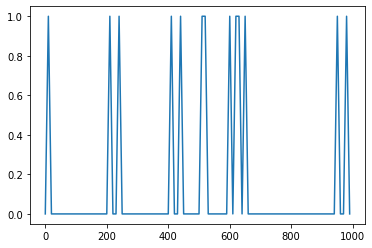

In [91]:
plt.plot(range(a, b, s), G1_num_of_triangles)

In [89]:
## TODO make the above a function and use lambda for the probability